<a href="https://colab.research.google.com/github/MahmoudGohar7/CarSellingPricePredictor/blob/main/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [2]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

make: ['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']

model: ['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sierra 1500' 'Cooper' 'XJ' 'Edge' 'Focus' 'Avenger'
 'Civic' 'Escape' 'Camry' 'Encore

In [3]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [4]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9700,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [5]:
df.isnull().sum() / len(df) * 100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [6]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [7]:
df['body'] = df['body'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,Suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,Suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [8]:
df=df.drop(columns=['vin', 'state','seller','mmr','saledate'])

In [9]:
df.drop(columns=['trim'])

,year,make,model,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,Sedan,automatic,3.9,50404.0mi,black,gray,$10900
1,2014,Toyota,4Runner,Suv,automatic,4.9,17846.0mi,gray,—,$29900
2,2012,Lexus,IS 250,Sedan,automatic,4.1,21122.0mi,silver,black,$24200
3,2002,BMW,X5,Suv,automatic,1.9,145303.0mi,black,black,$3200
4,2014,Ford,E-Series Van,E-series van,automatic,4.9,6714.0mi,white,gray,$22100
...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,Suv,automatic,3.5,52844.0mi,—,gray,$17000
46574,2012,Infiniti,G Sedan,G sedan,automatic,4.5,23185.0mi,black,black,$21500
46575,2013,BMW,3 Series,Sedan,automatic,4.2,45357.0mi,white,beige,$22000
46576,2013,Toyota,Camry,Sedan,automatic,3.5,43376.0mi,black,beige,$13800


In [10]:
#df['mmr'] = df['mmr'].str.strip('$')

In [11]:
#df['mmr'] = df['mmr'].astype(int)

In [12]:
df['sellingprice'] = df['sellingprice'].str.strip('$')

In [13]:
df['sellingprice'] = df['sellingprice'].astype(int)

In [14]:
df['odometer'] = df['odometer'].str.strip('mi')

In [15]:
df['odometer'] = df['odometer'].astype(float)

In [16]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   condition     46578 non-null  float64
 7   odometer      46578 non-null  float64
 8   color         46578 non-null  object 
 9   interior      46578 non-null  object 
 10  sellingprice  46578 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 3.9+ MB


In [18]:
for col in df.select_dtypes(object).columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace('—', np.NaN, regex=False)

In [19]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,SR5,Suv,automatic,4.9,17846.0,gray,NaN,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,4.4i,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,4.9,6714.0,white,gray,22100


In [20]:
df.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
condition          0
odometer           0
color           2246
interior         988
sellingprice       0
dtype: int64

In [21]:
df.mode()['interior'][0]

'black'

In [22]:
df.mode()['color'][0]

'black'

In [23]:
df.loc[:, 'interior'] = df.loc[:, 'interior'] .fillna('black')
df

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,SR5,Suv,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,4.4i,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,4.9,6714.0,white,gray,22100
...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,3.5,52844.0,NaN,gray,17000
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,4.5,23185.0,black,black,21500
46575,2013,BMW,3 Series,328i,Sedan,automatic,4.2,45357.0,white,beige,22000
46576,2013,Toyota,Camry,LE,Sedan,automatic,3.5,43376.0,black,beige,13800


In [24]:
df.loc[:, 'color'] = df.loc[:, 'color'] .fillna('black')
df

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,SR5,Suv,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,4.4i,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,4.9,6714.0,white,gray,22100
...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,3.5,52844.0,black,gray,17000
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,4.5,23185.0,black,black,21500
46575,2013,BMW,3 Series,328i,Sedan,automatic,4.2,45357.0,white,beige,22000
46576,2013,Toyota,Camry,LE,Sedan,automatic,3.5,43376.0,black,beige,13800


In [25]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64

In [26]:
#df=df.drop(columns=['vin', 'state','seller','mmr','saledate'])

In [27]:
df

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,SR5,Suv,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,4.4i,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,E-250,E-series van,automatic,4.9,6714.0,white,gray,22100
...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,Suv,automatic,3.5,52844.0,black,gray,17000
46574,2012,Infiniti,G Sedan,G37 Journey,G sedan,automatic,4.5,23185.0,black,black,21500
46575,2013,BMW,3 Series,328i,Sedan,automatic,4.2,45357.0,white,beige,22000
46576,2013,Toyota,Camry,LE,Sedan,automatic,3.5,43376.0,black,beige,13800


In [28]:
df.loc[df['body'].str.contains('sedan', case = False), 'body'] = 'Sedan'
df.loc[df['body'].str.contains('coupe', case = False), 'body'] = 'Coupe'
df.loc[df['body'].str.contains('suv', case = False), 'body'] = 'SUV'
df.loc[df['body'].str.contains('van', case = False), 'body'] = 'Mini-Van'
# df.loc[df['body'].str.contains('cab' or 'SuperCrew', case = False), 'body'] = 'Pickup Truck'
df.loc[df['body'].str.contains('wagon', case = False), 'body'] = 'Wagon'
df.loc[df['body'].str.contains('hatchback', case = False), 'body'] = 'Hatchback'
df.loc[df['body'].str.contains('convertible', case = False), 'body'] = 'Convertible'
df.loc[df['body'].str.contains('Koup', case = False), 'body'] = 'Coupe'
df.loc[df['body'].str.contains('cab', case = False), 'body'] = 'Pickup Truck'
df.loc[df['body'].str.contains('SuperCrew', case = False), 'body'] = 'Pickup Truck'
df.loc[df['body'].str.contains('Pickup', case = False), 'body'] = 'Pickup Truck'

In [29]:
df['body'].unique()

array(['Sedan', 'SUV', 'Mini-Van', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [30]:
df.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,E-250,Mini-Van,automatic,4.9,6714.0,white,gray,22100


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

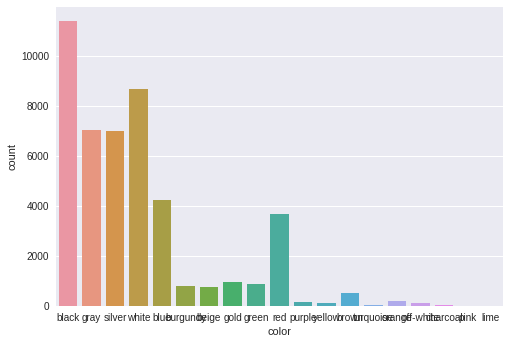

In [31]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

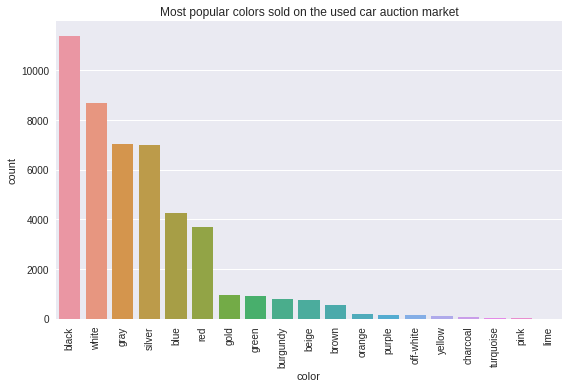

In [32]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

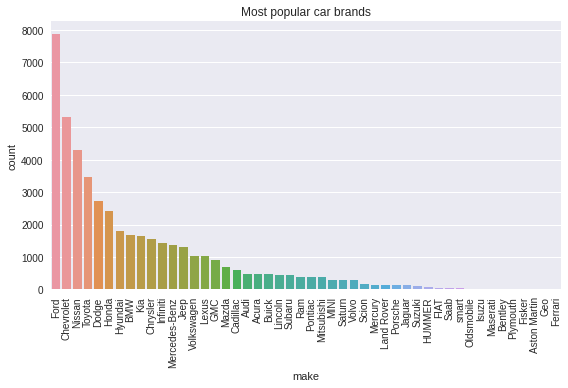

In [33]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The top three branfs are Ford, Chevrolet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

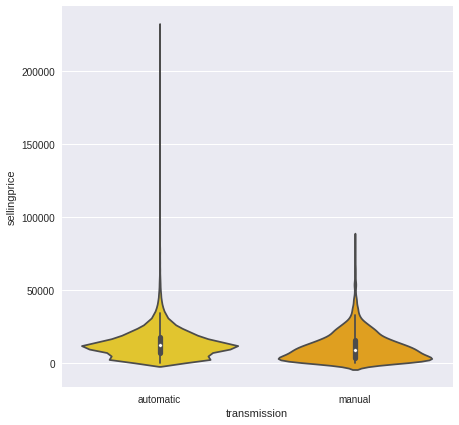

In [34]:
f = plt.figure(figsize=(7,7))
sns.violinplot(x='transmission', y='sellingprice', data=df, palette='Wistia')

**Answer for Q2**: As shown in the figure, automatic cars usually sell for more than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

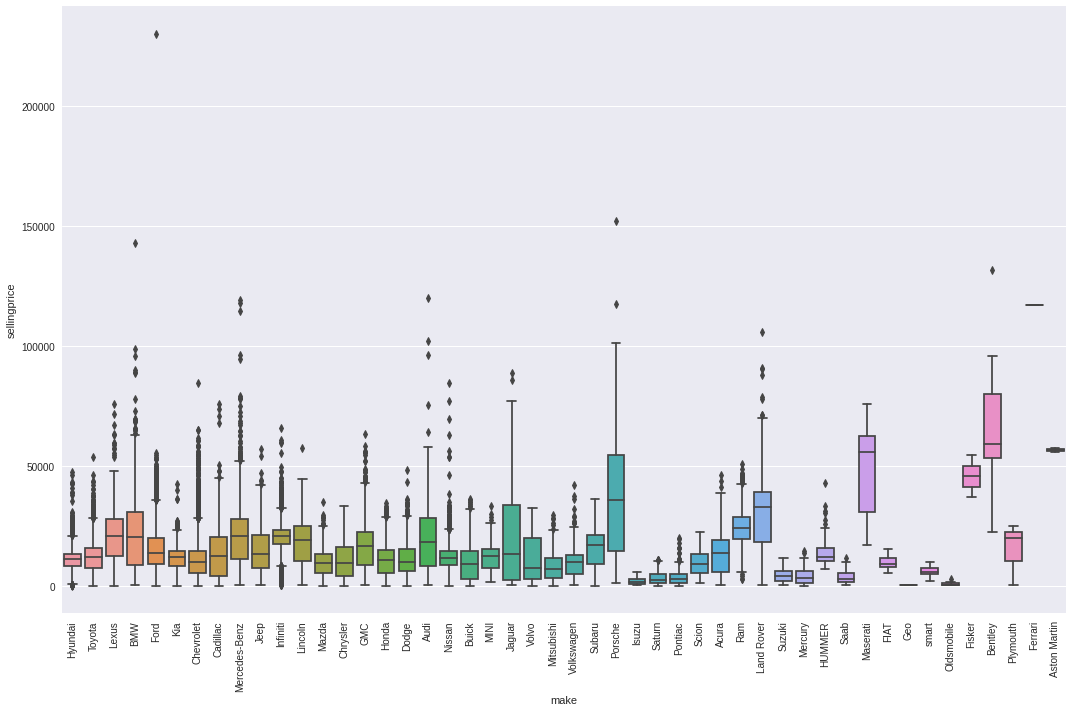

In [35]:
f= plt.figure(figsize= (15,10))
sns.boxplot(x='make', y="sellingprice", data=df)
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: Widest selling price distribution: Porsche and Jaguar

Most expensive: Ford, Ferrari

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

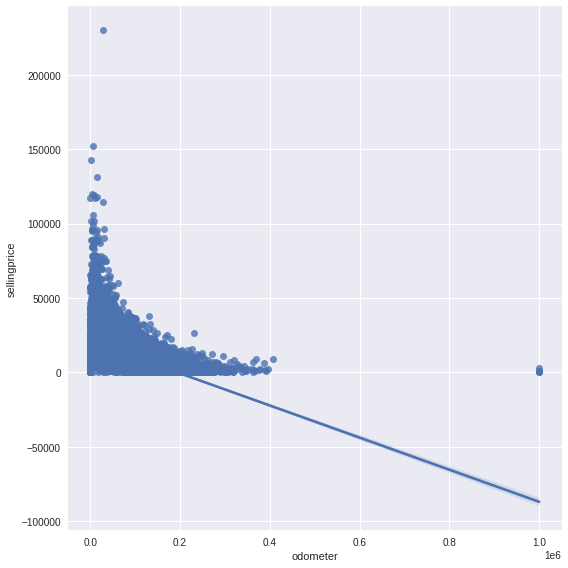

In [36]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='viridis', height=8)

**Answer for Q4**: The correlation is a negative one. As the miles on the odometer increases, the price decreases.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

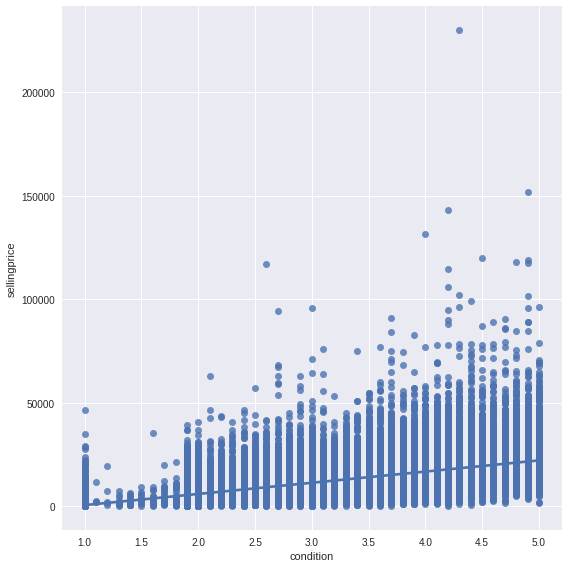

In [37]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='viridis', height=8);

**Answer for Q5**: The correlation is positive. As the score of the condition increases, the selling price increases.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

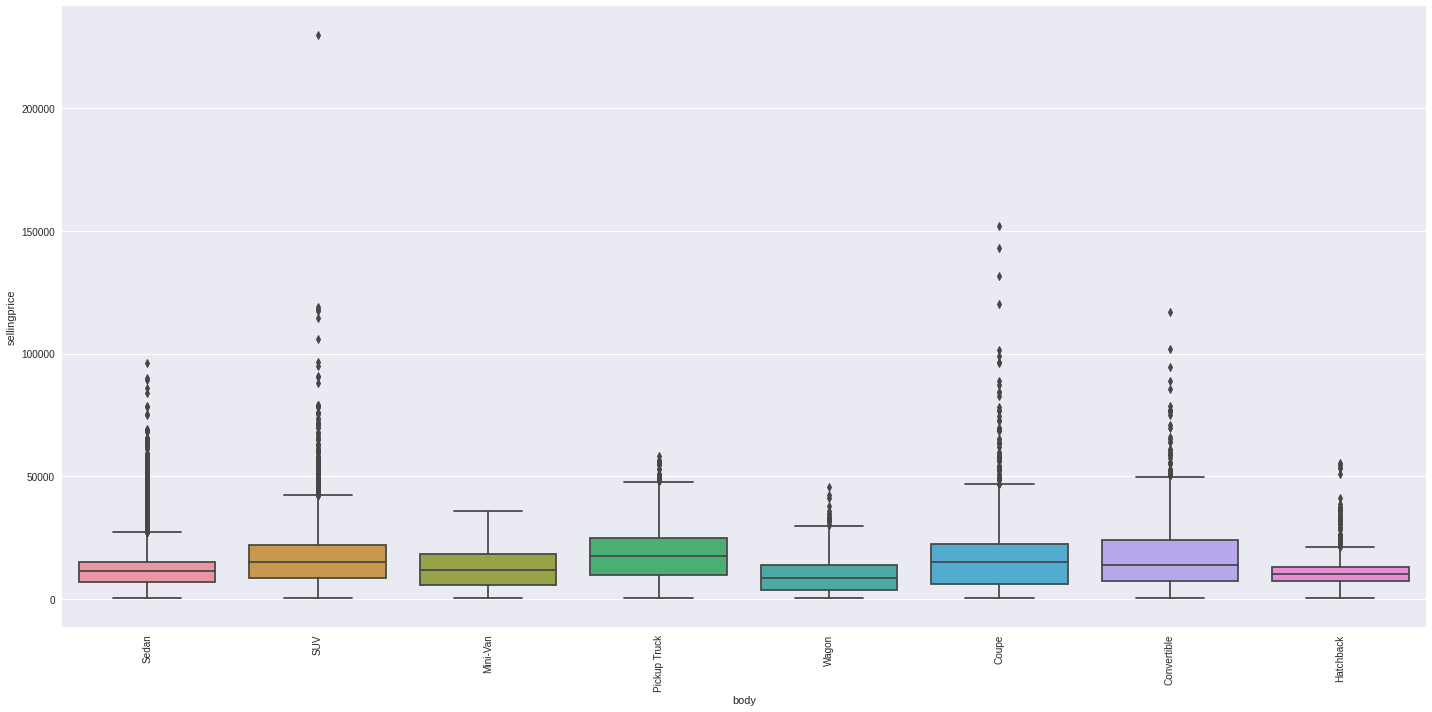

In [38]:
f= plt.figure(figsize= (20,10))
sns.boxplot(x='body', y="sellingprice", data=df)
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q6**: Yes the body type affects the selling price. The ranking is Pickup Truck, SUV, Coupe, Convertible, Mini-Van, Sedan, Wagon, Hatchback sorted ascendingly.





## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [39]:
categorical_columns = ['make', 'transmission', 'color']
df_encoded = pd.get_dummies(data=df, columns=categorical_columns, dtype='int8')
df_encoded.head()

,year,model,trim,body,condition,odometer,interior,sellingprice,make_Acura,make_Aston Martin,...,color_lime,color_off-white,color_orange,color_pink,color_purple,color_red,color_silver,color_turquoise,color_white,color_yellow
0,2013,Sonata,GLS,Sedan,3.9,50404.0,gray,10900,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4Runner,SR5,SUV,4.9,17846.0,black,29900,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,IS 250,Base,Sedan,4.1,21122.0,black,24200,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2002,X5,4.4i,SUV,1.9,145303.0,black,3200,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,E-Series Van,E-250,Mini-Van,4.9,6714.0,gray,22100,0,0,...,0,0,0,0,0,0,0,0,1,0


## Modelling

_Apply the linear regression model below._

In [40]:
df=df.drop(columns=['model'])

In [41]:
from sklearn.model_selection import train_test_split
x = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23)
print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])
print(x_train)

Training dataset size: 32604
Testing dataset size: 13974
       year             model                  trim          body  condition  \
39661  2007   Ram Pickup 2500                    ST  Pickup Truck        3.0   
25567  2011  Silverado 2500HD                   LTZ  Pickup Truck        4.1   
27247  2004               G35                  Base         Coupe        3.2   
11221  2006           Sequoia               Limited           SUV        2.3   
42171  2004              FX35                  Base           SUV        1.9   
...     ...               ...                   ...           ...        ...   
9704   2011                A5  2.0T Premium quattro   Convertible        4.6   
11190  2010             F-150                   FX4  Pickup Truck        3.1   
26569  2009           Enclave                   CXL           SUV        5.0   
9256   2003          Windstar                   SEL      Mini-Van        2.4   
41555  2012            fortwo         passion coupe     Hatchba

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train);

ValueError: ignored

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
linear_reg.score(X_test, y_test)

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The accuracy of the model is good enough to give estimates for the selling prices of cars. A car dealership can use it to get reliable estimates.